# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [71]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as tsa
from statsmodels.tools.eval_measures import rmse


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [24]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
date,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:
sensor.isna().sum()
# no missing value

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [7]:
# Your code here:
sensor.shape
# 1751 rows & 12 columns

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [22]:
# Your code here:
#sensor.info()
sensor['date'] = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10',periods=1751)

Assign the time series index to the dataframe's index.

In [26]:
# Your code here:
sensor.index =  pd.DatetimeIndex(sensor.date) 


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

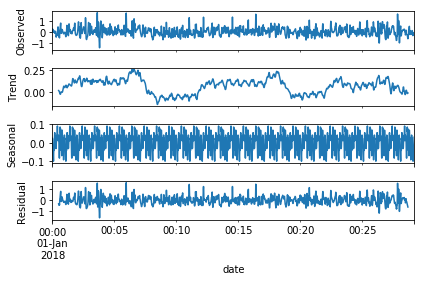

In [31]:
# Your code here:
res =  sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
resplot = res.plot()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

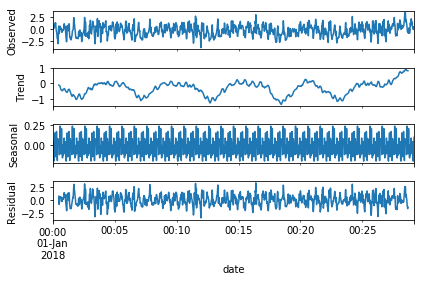

In [32]:
res =  sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
resplot = res.plot()



# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

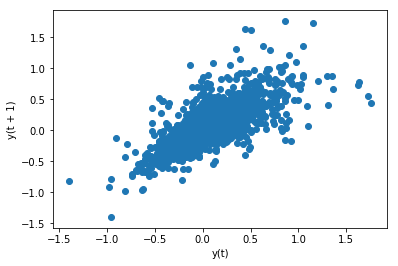

In [34]:
# Your code here:
lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

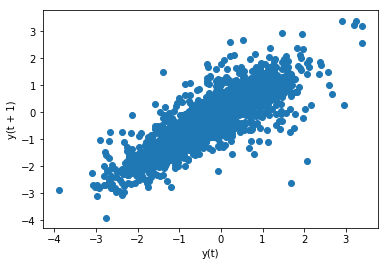

In [35]:
# Your code here:
lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
'''
They show a linear pattern, they suggest autocorrelation is present. And the positve linear 
trend is suggestive of positive autocorrelation.
And outliers are easily discernible
'''

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [39]:
# Your code here:
res=adfuller(sensor['userAcceleration.x'])
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print('Critical Values:')
for i,j in res[4].items():
    print(f"\t {i}: {j}")

print('')

res=adfuller(sensor['rotationRate.x'])
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print('Critical Values:')
for i,j in res[4].items():
    print(f"\t {i}: {j}")


ADF STATS: -17.957994086169748
p-value: 2.823439483037483e-30
Critical Values:
	 1%: -3.434100824760071
	 5%: -2.863196780129223
	 10%: -2.5676520210882936

ADF STATS: -5.26986062508642
p-value: 6.320230335912249e-06
Critical Values:
	 1%: -3.4341465551936534
	 5%: -2.863216966926812
	 10%: -2.567662770090317


What are your conclusions from this test?

In [13]:
# Your conclusions here:
'''
h0 : y is not stationary | h1 : y is stationary
p-value is low, they are stationary, the H0 is rejected
'''


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [100]:
# Your code here:
train,test = sensor['userAcceleration.x'][:-10],sensor['userAcceleration.x'][-10:]
model =tsa.ARMA(sensor['userAcceleration.x'].values, order =(2,1))
model_fit=model.fit()
#results= tsa.ARMA.fit()

predictions = model_fit.predict(start = len(train), end = len(train) + len(test)-1,dynamic=False)
predictions

array([ 0.17277628,  0.11515922, -0.00826961, -0.18676157, -0.2292105 ,
       -0.13644047, -0.16265757,  0.03571929, -0.04352973,  0.00841479])

In [101]:
test

date
2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [102]:
# Your code here:
rmse(predictions, test, axis=0)

0.09383217005692368

In [ ]:
'''
https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values
'''